
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>


  
# Análisis Estadístico de Datos


# Cuadrados mínimos lineal

In [1]:
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from scipy.stats import chi2

## Datos

In [2]:
xdata = np.array([1.0, 2.5, 3.1, 4, 5.5])
ydata = np.array([1.85, 2.72, 5.15, 5.7, 6.9])
ysigma = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

In [3]:
ndatos = len(xdata)
ndatos

5

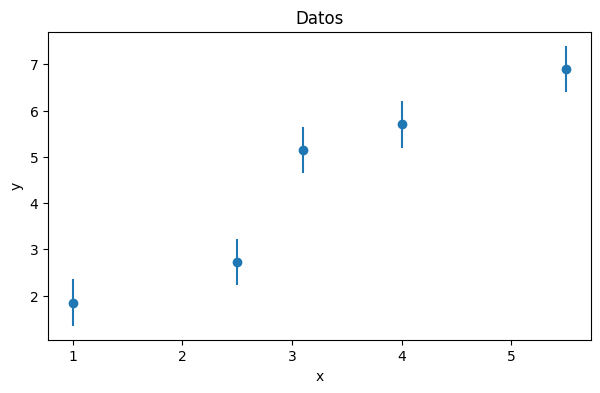

In [4]:
fig, ax = plt.subplots(figsize=(7,4))
plt.title("Datos")
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')
plt.show()

## Modelo

In [5]:
def modelo(x, y0, m):
    return y0 + m * x

## Función de costo

In [6]:
# funcion de costo vectorizada en theta para poder graficarla
# theta: np.array de dos dimensiones
def funcion_costo(theta, xdata, ydata, ysigma):
        y0 = theta[0]
        m = theta[1]
        costo = np.zeros_like(y0)
        for (x1, y1, sigma1) in zip(xdata, ydata, ysigma):
            mu1 = modelo(x1, y0, m)
            residuo = y1 - mu1
            z = residuo / sigma1
            costo += z*z
        return costo

In [7]:
J = lambda theta: funcion_costo(theta, xdata, ydata, ysigma)

In [8]:
y0 = np.linspace(-0.5, 1.5, 128)
m = np.linspace(0.8, 1.6, 128)
y0, m = np.meshgrid(y0, m)
theta = np.array([y0,m])
z = J(theta)

In [9]:
theta

array([[[-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ],
        [-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ],
        [-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ],
        ...,
        [-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ],
        [-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ],
        [-0.5       , -0.48425197, -0.46850394, ...,  1.46850394,
          1.48425197,  1.5       ]],

       [[ 0.8       ,  0.8       ,  0.8       , ...,  0.8       ,
          0.8       ,  0.8       ],
        [ 0.80629921,  0.80629921,  0.80629921, ...,  0.80629921,
          0.80629921,  0.80629921],
        [ 0.81259843,  0.81259843,  0.81259843, ...,  0.81259843,
          0.81259843,  0.81259843],
        ...,
        [ 1.58740157,  1.58740157,  1.58740157, ...,  

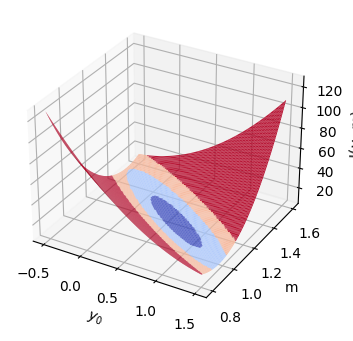

In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('$y_0$')
ax.set_ylabel('m')
ax.set_zlabel('J($y_0$,m)')
bounds = z.min() + np.array([0, 1, 4, 9, 16])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
ax.plot_surface(y0, m, z, cmap=cm.coolwarm, norm=norm, rstride=1, cstride=1, linewidth=0)
plt.show()

## Estimador de máxima verosimilitud

In [11]:
V = np.diag(ysigma*ysigma)
V

array([[0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25]])

In [12]:
A = np.column_stack([np.ones(ndatos), xdata])
A

array([[1. , 1. ],
       [1. , 2.5],
       [1. , 3.1],
       [1. , 4. ],
       [1. , 5.5]])

In [13]:
cova = inv( A.T @ inv(V) @ A )
cova

array([[ 0.28004082, -0.07144125],
       [-0.07144125,  0.02218672]])

In [14]:
B = cova @ A.T @ inv(V)
B

array([[ 0.8343983 ,  0.4057508 ,  0.2342918 , -0.0228967 , -0.4515442 ],
       [-0.1970181 , -0.06389776, -0.01064963,  0.06922258,  0.20234292]])

In [15]:
theta_est = B @ ydata
y0_est = theta_est[0]
m_est = theta_est[1]
theta_est

array([0.60771565, 1.19760383])

## Plot del ajuste

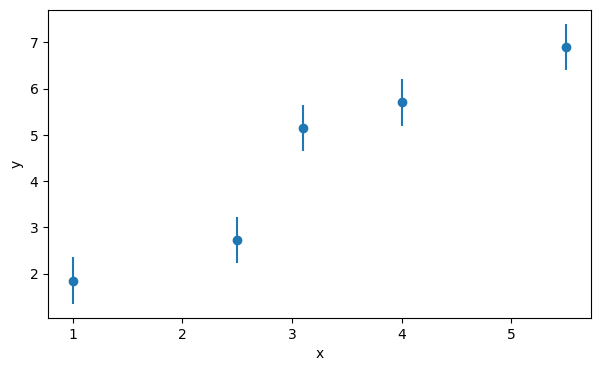

In [16]:
fig, ax = plt.subplots(figsize=(7,4))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')
plt.show()

Ajuste

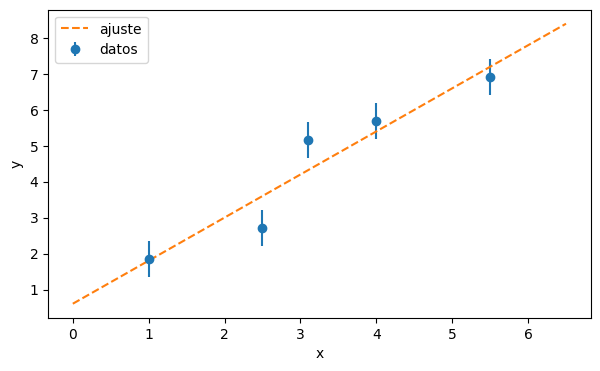

In [17]:
fig, ax = plt.subplots(figsize=(7,4))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')
x = np.linspace( xdata.min()-1, xdata.max()+1, 256)
mu_est = modelo(x, y0_est, m_est)
ax.plot(x, mu_est, ls='--', label='ajuste')
ax.legend()
plt.show()

## Errores de los parámetros

In [18]:
dy0 = math.sqrt(cova[0][0])
dm = math.sqrt(cova[1][1])
rho = cova[0][1] / (dy0 *dm)

In [19]:
print(f'Ordenada al origen:  {y0_est:2.2f} ± {dy0:2.2f}')
print(f'Pendiente ajustada: {m_est:2.2f} ± {dm:2.2f}')
print(f'Correlación: {rho:2.2f}')

Ordenada al origen:  0.61 ± 0.53
Pendiente ajustada: 1.20 ± 0.15
Correlación: -0.91


In [20]:
def get_ellipse(center, cova, nsigma=1):
    L = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, 1000)
    circulo = np.column_stack([np.cos(t), np.sin(t)])
    elipse =  nsigma * circulo @ L.T + center
    return elipse.T

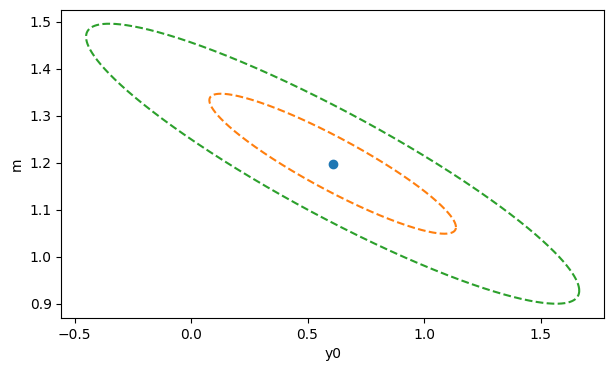

In [21]:
fig, ax = plt.subplots(figsize=(7,4))
ax.set_xlabel('y0')
ax.set_ylabel('m')
ax.plot(*theta_est, 'o')
elipse_1sigma = get_ellipse(theta_est, cova, nsigma=1)
ax.plot(*elipse_1sigma, ls='--')
elipse_2sigma = get_ellipse(theta_est, cova, nsigma=2)
ax.plot(*elipse_2sigma, ls='--')
plt.show()

## Bondad del ajuste

In [22]:
residuos = ydata - A@theta_est
J_min_observado = residuos.T @ inv(V) @ residuos
J_min_observado

6.582941214057506

In [23]:
grados_libertad = ndatos - 2
grados_libertad

3

In [24]:
pvalor = chi2.sf(J_min_observado, grados_libertad)
print(f'pvalor = {pvalor*100:.2f}%')

pvalor = 8.64%


## Banda de error

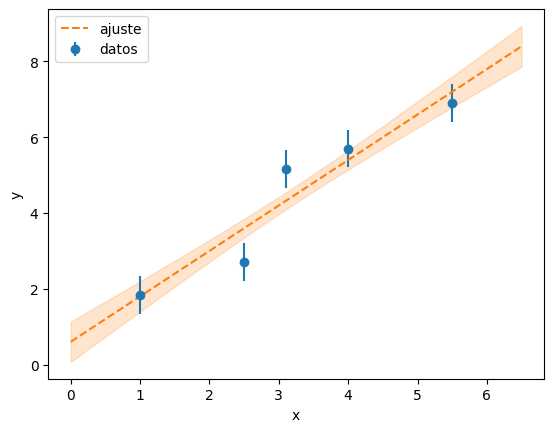

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')
ax.plot(x, mu_est, ls='--', label='ajuste')
var_mu_est = cova[0][0] + x**2*cova[1][1] + 2*x*cova[0][1]
sigma_mu_est = np.sqrt(var_mu_est)
ax.fill_between(x, mu_est-sigma_mu_est, mu_est+sigma_mu_est, color='tab:orange', alpha=0.2)
ax.legend()
plt.show()